In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
data = pd.read_excel(r'C:\Users\vince\intelligenza_computazionale\Campania.xlsx',index_col=None, na_values=['NA'], usecols="A:F, N, O")
data

,Type,Detail_tag,Name,x,y,z,x_path,y_path
0,Structure,Entrance,Entrance 1,0.0,0.0,0.0,0.0,0.0
1,Shop,Electronics,Dyson,5.0,5.0,0.0,0.0,5.0
2,Shop,Optics,Optimissimo,-5.0,10.0,0.0,0.0,10.0
3,Shop,Wellness,David,5.0,10.0,0.0,0.0,10.0
4,Shop,Clothing,Tezenis,-5.0,15.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...
181,Shop,Clothing,Persona,55.0,25.0,0.0,NaN,NaN
182,Shop,Clothing,Kocca,52.5,21.0,0.0,NaN,NaN
183,Shop,Clothing,Marella,50.0,16.0,0.0,NaN,NaN
184,Shop,Clothing,Tommy Hilfiger,50.0,10.0,0.0,NaN,NaN


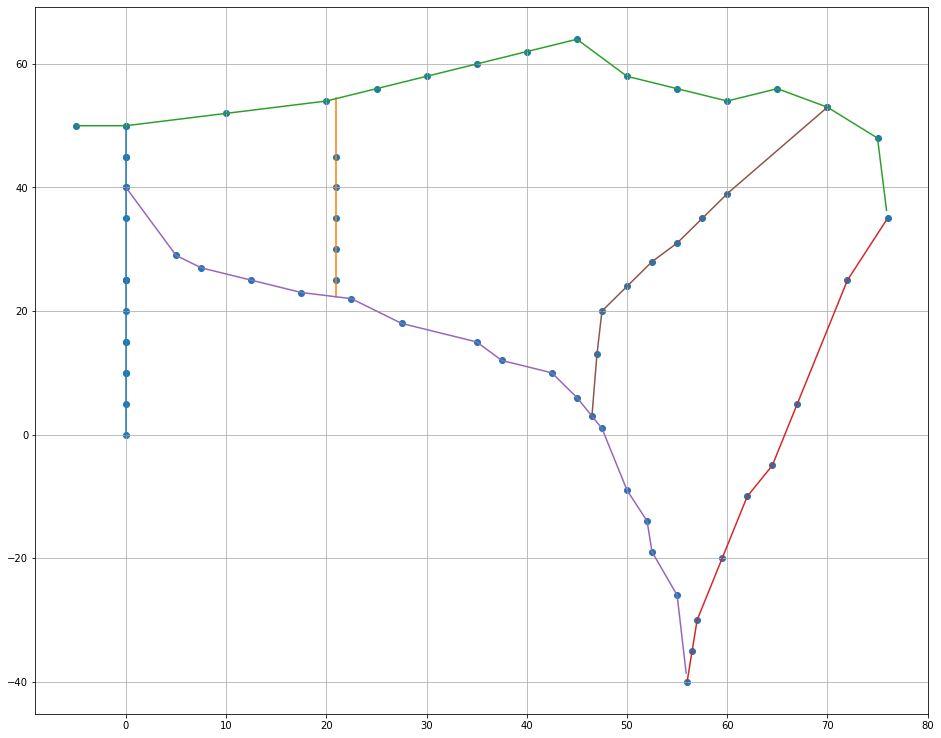

In [47]:
x_path = np.ravel((pd.DataFrame(data, columns = ['x_path']).dropna()).to_numpy())
y_path = np.ravel((pd.DataFrame(data, columns = ['y_path']).dropna()).to_numpy())
left_x_raw, left_y_raw = x_path[0:15], y_path[0:15]
midleft_x_raw, midleft_y_raw = x_path[15:20], y_path[15:20]
upper_x_raw, upper_y_raw = x_path[20:36], y_path[20:36]
right_x_raw, right_y_raw = x_path[35:44], y_path[35:44]
lower_x_raw, lower_y_raw = x_path[43:60], y_path[43:60]
midright_x_raw, midright_y_raw = x_path[60:len(x_path)], y_path[60:len(x_path)]

#print(x_path)
#print(np.linspace(0,51, 200))

plt.figure(figsize=(16,13))
plt.scatter(x_path, y_path)
upper = interpolate.interp1d(upper_x_raw, upper_y_raw, kind = 'linear')
right = interpolate.interp1d(right_x_raw, right_y_raw, kind = 'linear')
lower = interpolate.interp1d(lower_x_raw, lower_y_raw, kind = 'linear')
midright = interpolate.interp1d(midright_x_raw, midright_y_raw, kind = 'linear')
def left(x): return np.zeros(len(x))
def midleft(x): return np.ones(len(x))*21


width= .1
left_x, left_y = left(np.arange(min(left_y_raw), max(left_y_raw), width)) , np.arange(min(left_y_raw), max(left_y_raw), width)
midleft_x, midleft_y = midleft(np.arange(22.2, 54.599999999999966, width)) , np.arange(22.2, 54.599999999999966, width)
upper_x, upper_y = np.arange(min(upper_x_raw), max(upper_x_raw), width), upper(np.arange(min(upper_x_raw), max(upper_x_raw), width))
right_x, right_y = np.arange(min(right_x_raw), max(right_x_raw), width), right(np.arange(min(right_x_raw), max(right_x_raw), width))
lower_x, lower_y = np.arange(min(lower_x_raw), max(lower_x_raw), width), lower(np.arange(min(lower_x_raw), max(lower_x_raw), width))
midright_x, midright_y = np.arange(min(midright_x_raw), max(midright_x_raw), width), midright(np.arange(min(midright_x_raw), max(midright_x_raw), width))




plt.plot(left_x, left_y)
plt.plot(midleft_x, midleft_y)
plt.plot(upper_x, upper_y)
plt.plot(right_x, right_y)
plt.plot(lower_x, lower_y)
plt.plot(midright_x, midright_y)
plt.grid()
plt.show()

In [62]:
Type = (data['Type'].dropna()).tolist()
Detail = (data['Detail_tag'].dropna()).tolist()
Name = (data['Name'].dropna()).tolist()
x = np.ravel((pd.DataFrame(data, columns = ['x']).dropna()).to_numpy())
y = np.ravel((pd.DataFrame(data, columns = ['y']).dropna()).to_numpy())
z = np.ravel((pd.DataFrame(data, columns = ['z']).dropna()).to_numpy())

Shops_ground = []
Food_ground = []
Elevators_ground = []
Shops_first = []
Food_first = []
Elevators_first = []
Entrances = []

for i in range(len(x)):
    obj = [Type[i], Detail[i], Name[i], x[i], y[i], z[i]]
    if z[i] == 0:
        if Type[i] == "Structure":
            if Detail[i] == "Elevator":
                Elevators_ground.append(obj)
            else:
                Entrances.append(obj)
        elif Type[i] == "Food":
            Food_ground.append(obj)
        elif Type[i] == "Shop":
            Shops_ground.append(obj)
    elif z[i]==1:
        if Type[i] == "Structure":
            if Detail[i] == "Elevator":
                Elevators_first.append(obj)
        elif Type[i] == "Food":
            Food_first.append(obj)
        elif Type[i] == "Shop":
            Shops_first.append(obj)
#print(left_y)
#print(upper_x)
#print(lower_y)
#print(midleft_y)
#print(midright_x)
#print(right_x)

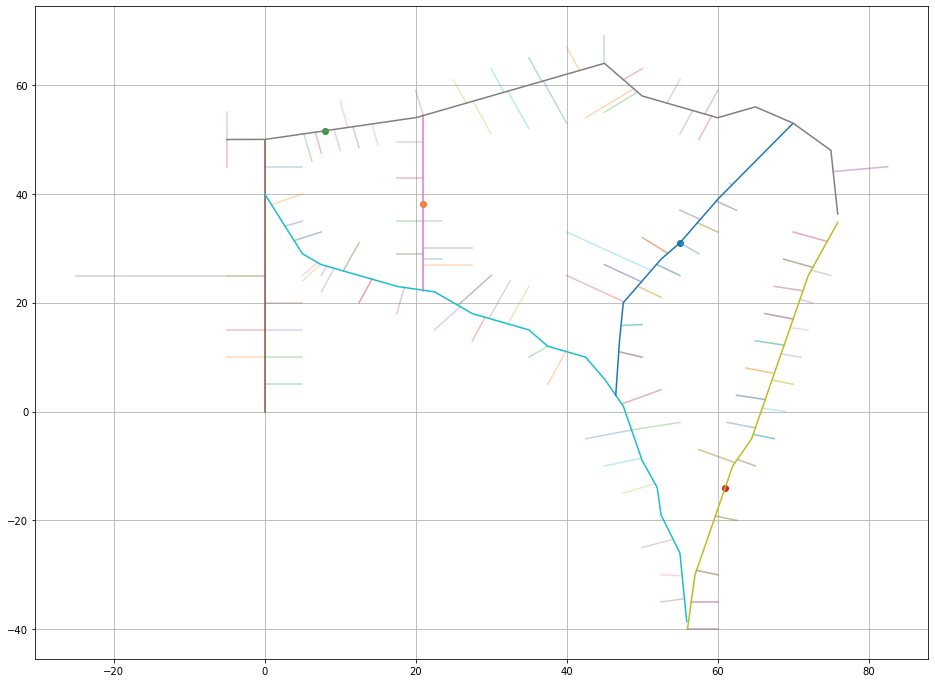

In [240]:
def distance(category):
    proj = []
    dist = []
    index = []
    for i in range(len(category)):
        pos, D =[], []
        for j in range(len(upper_x)):
            x,y = upper_x[j], upper_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(left_x)):
            x,y = left_x[j], left_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(midleft_x)):
            x,y = midleft_x[j], midleft_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(right_x)):
            x,y = right_x[j], right_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(midright_x)):
            x,y = midright_x[j], midright_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(lower_x)):
            x,y = lower_x[j], lower_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        #print(D)

        for j in range(len(D)):
            if D[j]==min(D):
                dist.append(D[j]*0.5)
                proj.append(pos[j])
                break
                #print(min(D))
                #print(category[i][3], category[i][4], pos[j])
                #print(np.sqrt((pos[j][0]-category[i][3])**2+(pos[j][1]-category[i][4])**2)-D[j])
                #print("truth", [pos[j][0],category[i][3]], [pos[j][1], category[i][4]])

          
      
    return proj, dist
plt.figure(figsize=(16,12))
a = distance(Shops_ground)
#for i in range(len(Shops_ground)):
    #print(a[2][i], [Shops_ground[i][3], Shops_ground[i][4]])

for i in range(len(Shops_ground)):
    plt.plot([a[0][i][0], Shops_ground[i][3]], [a[0][i][1], Shops_ground[i][4]], alpha = 0.3)
plt.plot(left_x, left_y)
plt.plot(midleft_x, midleft_y)
plt.plot(upper_x, upper_y)
plt.plot(right_x, right_y)
plt.plot(lower_x, lower_y)
plt.plot(midright_x, midright_y)

plt.scatter(midright_x[85], midright_y[85])
plt.scatter(midleft_x[160], midleft_y[160])
plt.scatter(upper_x[130], upper_y[130])
plt.scatter(right_x[50], right_y[50])
plt.grid()
plt.show()

for i in range(len(Shops_ground)):
    Shops_ground[i].append(a[0][i][0])
    Shops_ground[i].append(a[0][i][1])
    Shops_ground[i].append(a[1][i])



In [241]:
#for i in range(len(left_x)):
    #print(left_x[i], left_y[i])
    
index= np.where(left_y==40.0)[0][0]
print(len(left_y))
print(len(upper_x))
print(index)

#print(midright_x.index(58.40000000000017))

#for i in range(len(lower_x)):
    #print(lower_x[i], lower_y[i])


500
810
400


In [242]:
#for i in range(len(upper_x)):
    #for j in range(len(midleft_x)):
       # if upper_x[i]==midleft_x[j] and upper_y[i]==midleft_y[j]:
            #print(left_x[i], left_y[i])
#print(left_y)

#index 85 for the fixed point
intersection_left_lower = (0.0, 40.0) #index 400
intersection_left_upper = (0.0, 55.0)
intersection_lower_midright = (46.0, 6.0) #index 460
intersection_lower_midleft = (21.5, 22.2) #index 215
intersection_upper_midleft = (21.499999999999908, 54.599999999999966) #index 265
intersection_upper_midright = (71.49999999999973, 51.50000000000027) #index 765

for i in Shops_ground:
    counter = 0
    for j in Shops_ground:
        if i[2] == j[2]:
            counter += 1
    print(counter, i[2])
    #if i[2]=="Guess":
        #print(i[6], i[7])

1 Dyson
1 Optimissimo
1 David
1 Tezenis
1 Re sole
1 Bialetti
1 Bijou Brigitte
2 Melluso
1 Piazza Italia
1 Calzedonia
1 D'Amante
1 Centri Unico
1 Bottega Verde
1 Vodafone
1 Stroili
1 Wycon
1 Vista Expert
1 Yves Rocher
1 Gamestop
1 Zuiki
1 Miriade
1 Hombre
1 Caporiccio
1 Xiaomi
1 Primark
1 Pittarosso
1 MediaWorld
1 HeM
1 HeM HOME
1 Original Marines
1 Scarpe&Scarpe
1 Mallardo
1 Cisalfa
1 Casanova Home
1 Tim
1 Bic Toy Store
1 Tiger
1 AW Lab
1 Zara
1 Dodo
1 Bluespirit
1 LiuJo
1 Alcott
1 Amen
1 Funside
1 Salmoiraghi
1 Thun
1 Marlù
1 JD Sports
1 Bata
1 Erbolario
1 Bershka
1 Golden Point
1 Benetton
1 Calliope
1 NEED
1 Bassetti
1 Idexe
2 Melluso
1 Madi Gioielli
1 Dr Martens
1 Swarowski
1 Bed & Well
1 Oltre
1 Intimissimi
1 Motivi
1 Geox
1 Sephora
1 Parfois
1 Mango
1 Okaidi
1 Lego
1 Toys con Te
1 Erboristeria
1 Folletto
1 Lily
1 Mac
1 Rinascimento
1 Yamamay
2 Fiorella Rubino
1 Sorbino
1 Pandora
1 Clayton
1 Sottotono
2 Guess
1 Claire
1 Elena Mirò
1 Dan Jon
1 Lush
1 Carpisa
1 Aldo Shoes
1 Falconeri

In [271]:
# fixed x 
def distance_fixed(point):
    width = .1
    #print(point)
    for i in Shops_ground:
        if i[2] == point:
            x = i[6]
            #print(x)
            y = i[7]
            #print(y)
            initial_distance=i[8]
    for j in range(len(midright_x)):
        if x == midright_x[j] and y == midright_y[j]:
            #print("midright")
            index = np.where(midright_x==x)[0][0]
            dist = initial_distance + (abs(midright_x[index]-midright_x[85]))*width
            return dist
    for j in range(len(lower_x)):
        if x == lower_x[j] and y == lower_y[j]:
            #print("lower")
            index = np.where(lower_x==x)[0][0]
            dist1 = initial_distance+(abs(lower_x[460]-lower_x[index]))*width
            #print(dist1)
            dist2 = abs(midright_x[0]-midright_x[85])*width
            #print(dist2)
            dist = dist1+dist2
            return dist
    for j in range(len(left_x)):
        if x == left_x[j] and y == left_y[j]:
            #print("left")
            index = np.where(left_y==y)[0][0]
            dist1 = initial_distance+(abs(left_y[index]-left_y[400]))*width
            dist2 = abs((lower_x[0])-lower_x[460])*width
            dist3 = abs(midright_x[0]-midright_x[85])*width
            dist = dist1+dist2+dist3
            return dist
    for j in range(len(midleft_x)):
        if x == midleft_x[j] and y == midleft_y[j]:
            #print("midleft")
            index = np.where(midleft_y==y)[0][0]
            if index<160:
                dist1 = initial_distance+abs(midleft_y[index]-midleft_y[0])*width
                #print(dist1)
                dist2 = abs(lower_x[215]-lower_x[460])*width
                #print(dist2)
                dist3 = abs(midright_x[0]-midright_x[85])*width
                #print(dist3)
                dist = dist1+dist2+dist3
                return dist
            else:
                dist1 = initial_distance+abs(midleft_y[index]-midleft_y[len(midleft_y)-1])*width
                dist2 = abs(upper_x[265]-upper_x[765])*width
                dist3 = abs(midright_x[len(midright_x)-1]-midright_x[85])*width
                dist = dist1+dist2+dist3
                return dist
    for j in range(len(upper_x)):
        if x == upper_x[j] and y == upper_y[j]:
            #print("upper")
            index = np.where(upper_x==x)[0][0]
            if index>130:
                dist1=initial_distance+abs(upper_x[index]-upper_x[765])*width
                dist2=abs(midright_x[len(midright_x)-1]-midright_x[85])*width
                dist = dist1+dist2
                return dist
            else:
                dist1=initial_distance+abs(upper_x[index]-upper_x[0])*width
                dist2=abs(left_x[len(left_x)-1]-left_x[400])*width
                dist3 = abs((lower_x[0])-lower_x[460])*width
                dist4 = abs(midright_x[0]-midright_x[85])*width
                dist = dist1+dist2+dist3+dist4
                return dist
    for j in range(len(right_x)):
        if x == right_x[j] and y == right_y[j]:
            #print("right")
            index = np.where(right_x==x)[0][0]
            if index<50:
                dist1 = initial_distance+abs(right_x[index]-right_x[0])*width
                dist2 = abs(lower_x[len(lower_x)-1]-lower_x[460])*width
                dist3 = abs(midright_x[len(midright_x)-1]-midright_x[85])*width
                dist = dist1+dist2+dist3
                return dist
            else:
                dist1 = initial_distance+abs(right_x[index]-right_x[len(right_x)-1])*width
                dist2 = abs(upper_x[len(upper_x)-1]-upper_x[765])*width
                dist3 = abs(midright_x[len(midright_x)-1]-midright_x[85])*width
                dist = dist1+dist2+dist3
                return dist
        
            
            
    
    

In [272]:
print(distance_fixed("Claire"))
print(distance_fixed("Cisalfa"))
print(distance_fixed("MediaWorld"))
print(distance_fixed("Melluso"))
print(distance_fixed("Bialetti"))
print(distance_fixed("Geox"))
print(distance_fixed("Dyson"))
print(distance_fixed("Piazza Italia"))
print(distance_fixed("Dyson"))
print(distance_fixed("Swarowski"))
print(distance_fixed("Intimissimi"))
print(distance_fixed("Mango"))
print(distance_fixed("Oltre"))
print(distance_fixed("Lego"))
print(distance_fixed("Alcott"))
print(distance_fixed("Funside"))

3.410000000000004
9.140000000000084
12.443060268852506
8.61466387797978
12.450000000000014
9.917830390668243
13.950000000000014
11.950000000000014
13.950000000000014
7.480000000000022
7.080000000000031
13.630147168994016
11.14000000000002
4.6417853585373745
5.512043955712234
6.480000000000022


In [264]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def distance(point1, point2):
    width = .1
    for i in Shops_ground:
        if i[2] == point1:
            x1 = i[6]
            y1 = i[7]
            initial_distance1=i[8]
        if i[2] == point2:
            x2 = i[6]
            x2 = i[7]
            initial_distance2=i[8]
    paths_x = [left_x, midleft_x, lower_x, upper_x, midright_x, right_x]
    paths_y = [left_y, midleft_y, lower_y, upper_y, midright_y, right_y]
    for i in paths_y:
        for j in range(len(paths_y[i])):
            if x1 == paths_x[i][j] and  y1 == paths_y[i][j]:
                path1 = namestr(paths_y[i], globals())
                print(path1)
    for i in range(len(paths_y)):
        for j in range(len(paths_y[i])):
            if x2 == paths_x[i][j] and  y2 == paths_y[i][j]:
                path2 = namestr(paths_y[i], globals())
                print(path2)
        
    if path1==path2:
        index1 = np.where(path1==y1)[0][0]
        index2 = np.where(path1==y2)[0][0]
        d = initial_distance1+initial_distance2+abs(path1[index1]-path1[index2])*width
    else:
        d = abs(distance_fixed(point1)-distance_fixed(point2))
    return d
            

In [273]:
def distance(point1, point2):
    d = abs(distance_fixed(point1)-distance_fixed(point2))
    return d

In [277]:
print(distance("Lush", "Funside"))

2.208989355984018


In [278]:
import random
from deap import base, creator, tools

In [288]:
IND_SIZE=int(input("How many shops are you going to visit: "))
print("Shops Available")
SHOP_LIST = [Shops_ground[i][2] for i in range(len(Shops_ground))]
print(SHOP_LIST)
user_list=[]
for i in range(IND_SIZE):
    shop = input("Write a Shop: ")
    while shop not in SHOP_LIST:
        print("You wrote a shop thai is not in our mall or isn't spelled correctly. Please retry")
        shop = input("Write a Shop: ")
    user_list.append(shop)
print("Done")

How many shops are you going to visit: 5
Shops Available
['Dyson', 'Optimissimo', 'David', 'Tezenis', 'Re sole', 'Bialetti', 'Bijou Brigitte', 'Melluso', 'Piazza Italia', 'Calzedonia', "D'Amante", 'Centri Unico', 'Bottega Verde', 'Vodafone', 'Stroili', 'Wycon', 'Vista Expert', 'Yves Rocher', 'Gamestop', 'Zuiki', 'Miriade', 'Hombre', 'Caporiccio', 'Xiaomi', 'Primark', 'Pittarosso', 'MediaWorld', 'HeM', 'HeM HOME', 'Original Marines', 'Scarpe&Scarpe', 'Mallardo', 'Cisalfa', 'Casanova Home', 'Tim', 'Bic Toy Store', 'Tiger', 'AW Lab', 'Zara', 'Dodo', 'Bluespirit', 'LiuJo', 'Alcott', 'Amen', 'Funside', 'Salmoiraghi', 'Thun', 'Marlù', 'JD Sports', 'Bata', 'Erbolario', 'Bershka', 'Golden Point', 'Benetton', 'Calliope', 'NEED', 'Bassetti', 'Idexe', 'Melluso', 'Madi Gioielli', 'Dr Martens', 'Swarowski', 'Bed & Well', 'Oltre', 'Intimissimi', 'Motivi', 'Geox', 'Sephora', 'Parfois', 'Mango', 'Okaidi', 'Lego', 'Toys con Te', 'Erboristeria', 'Folletto', 'Lily', 'Mac', 'Rinascimento', 'Yamamay', 'Fio

In [289]:
random.seed(a=79514)
np.random.seed(0)

In [290]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

C:\Users\vince\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\vince\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [291]:
 #Various sizes of our problem
TOURN_SIZE = 3 #Size of tournament block

#Initialization of our random generator
toolbox = base.Toolbox()
toolbox.register('attr_string', lambda: random.choiche(user_list))


#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [292]:
#Evaluate function

def evaluate(individual, starting_point, ending_point):
    fit = 0
    for i in range(len(individual)):
        if individual[0] != starting_point:
            return 10000000
        elif individual[len(individual)-1]!=ending_point:
            return 10000000
        for j in range(len(individual)):
            if individual[i]==individual[j]:
                return 10000000
    for i in range(len(indivdual)-1):
        fit += distance(individual[i], lindividual[i+1])
    return fit
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [284]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, stats, weights, values, size=IND_SIZE): #other than the usual arguments, the function takes also the weights and values specified and the size of our problem
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    HOF = [] #List created in order to store the best-weight (the maximum under the treshold) processed for every generation
    
    #Creating the population
    #individuals
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_string, n=size) #here we can decide which size of our problem we are considering
    #population
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    
    pop = toolbox.population(n=POP_SIZE)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    

    for g in range(NGEN):
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.                                                                                                                   evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = [fit]

        if hof is not None:
            hof.update(offspring)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        HOF.append(hof[0]) #here, for instance, we add the best individual for eache iteration (generation) to the HOF list created above


        record = stats.compile(pop) if stats else{}
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        

    return pop, logbook, HOF #we return also the HOF list in order to evaluate the evolution of best-weights per generation

5
5
